In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


In [2]:
books_dataset = pd.read_csv('/kaggle/input/goodreadsbooks/books.csv',error_bad_lines=False)
books_dataset.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
books_dataset.shape

(11123, 12)

In [4]:
books_dataset.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
books_dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

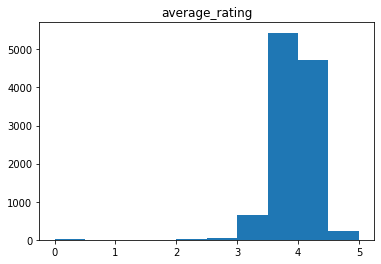

In [6]:
# plotting histograms for numerical variables
import matplotlib.pyplot as plt

numericals = books_dataset[['average_rating']]

for i in numericals.columns:
    plt.hist(numericals[i])
    plt.title(i)
    plt.show()

In [7]:
auth_df = books_dataset.groupby(['authors']).mean()[['average_rating']]
auth_df

,average_rating
authors,
A.B. Yehoshua/Hillel Halkin,3.600
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,3.760
A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,4.150
A.J. Jacobs,3.760
A.M. Homes,3.280
...,...
Émile Zola/Henri Mitterand,4.060
Émile Zola/Robert Lethbridge/Elinor Dorday,4.010
Émile Zola/Robin Buss/Brian Nelson,3.990


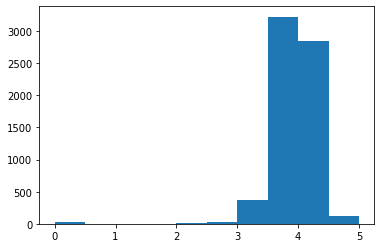

In [8]:
plt.hist(auth_df['average_rating'])
plt.show()

In [9]:
import re 
pattern = '/'
authors_rating = books_dataset[['authors','average_rating']]

def split_auths(str):
    strs = re.split('/',str)
    return strs 
authors = authors_rating['authors'].apply(split_auths)
authors 

0                            [J.K. Rowling, Mary GrandPré]
1                            [J.K. Rowling, Mary GrandPré]
2                                           [J.K. Rowling]
3                            [J.K. Rowling, Mary GrandPré]
4                            [J.K. Rowling, Mary GrandPré]
                               ...                        
11118    [William T. Vollmann, Larry McCaffery, Michael...
11119                                [William T. Vollmann]
11120                                [William T. Vollmann]
11121                                [William T. Vollmann]
11122                                         [Mark Twain]
Name: authors, Length: 11123, dtype: object

In [10]:
ratings = authors_rating['average_rating']
ratings

0        4.57
1        4.49
2        4.42
3        4.56
4        4.78
         ... 
11118    4.06
11119    4.08
11120    3.96
11121    3.72
11122    3.91
Name: average_rating, Length: 11123, dtype: float64

In [11]:
author_numbers = authors.apply(lambda x:len(x))
author_numbers

0        2
1        2
2        1
3        2
4        2
        ..
11118    3
11119    1
11120    1
11121    1
11122    1
Name: authors, Length: 11123, dtype: int64

In [12]:
import itertools 
ratings_with_duplis = []
for i in range(len(ratings)):
    for j in range(author_numbers[i]):
        ratings_with_duplis.append(ratings[i])

authors_with_duplis = list(itertools.chain.from_iterable(authors))

print(len(authors_with_duplis), len(ratings_with_duplis))

19237 19237


In [13]:
book_wise_auth = pd.DataFrame(list(zip(authors_with_duplis, ratings_with_duplis)), columns=['author','rating'])
book_wise_auth

,author,rating
0,J.K. Rowling,4.57
1,Mary GrandPré,4.57
2,J.K. Rowling,4.49
3,Mary GrandPré,4.49
4,J.K. Rowling,4.42
...,...,...
19232,Michael Hemmingson,4.06
19233,William T. Vollmann,4.08
19234,William T. Vollmann,3.96
19235,William T. Vollmann,3.72


In [14]:
author_overall_rating = book_wise_auth.groupby(['author']).mean()
author_overall_rating

,rating
author,
A. Bartlett Giamatti,4.240000
A. Elizabeth Delany,4.020000
A. Merritt,3.930000
A. Roger Merrill,4.100000
A. Walton Litz,3.850000
...,...
橋口 たかし,3.980000
皇冠編譯組,4.570000
神尾葉子,4.116667


Now that we have extracted an average rating for each of the individual authors that appear across the dataset, we can find the highest rated and lowest rated authors. 

If a particular book is co-authored by 2 people, that rating is considered for each of them(towards their individual rating)

In [15]:
five_star_rated_authors = author_overall_rating.where(author_overall_rating['rating']==np.max(author_overall_rating['rating'])).dropna()
five_star_rated_authors

,rating
author,
Alisa Klayman-Grodsky,5.0
Chris Green,5.0
Chris Wright,5.0
David Sylvester,5.0
Dennis Adler,5.0
Elena N. Mahlow,5.0
Eric Weiner,5.0
F.W. Hall,5.0
Ian Martin,5.0


There are a lot of auhtors who have ALL BOOKS rated 5 star, which means that there are some authors who have written only one book and might not be an indication of an "overall rating" for the authors, so lets filter out authors who have written atleast 2 books. 

In [16]:
book_counts = book_wise_auth.groupby(['author']).count()
book_counts.rename(columns={'rating':'count'},inplace=True)
book_counts

,count
author,
A. Bartlett Giamatti,1
A. Elizabeth Delany,1
A. Merritt,1
A. Roger Merrill,1
A. Walton Litz,1
...,...
橋口 たかし,2
皇冠編譯組,1
神尾葉子,3


In [17]:
book_counts.describe()

,count
count,9231.000000
mean,2.083956
std,3.555015
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,99.000000


Looks like most of the authors have written only 1 book, 75th percentile is 2 so, we should consider atleast 2 books written.

In [18]:
multiple_books_auth=np.array(book_counts.where(book_counts['count'] > 1).dropna().index.values)
multiple_books_auth

array(['A.B. Yehoshua', 'A.J. Ayer', 'A.N. Roquelaure', ..., '橋口 たかし',
       '神尾葉子', '荒川弘'], dtype=object)

In [19]:
author_overall_rating = author_overall_rating.reset_index()

In [20]:
best_rated_auths = author_overall_rating[author_overall_rating['author'].isin(multiple_books_auth)].sort_values('rating',ascending=False)
best_rated_auths

,author,rating
817,Bill Watterson,4.708571
9133,Xavier de C.,4.670000
5886,Matt Thorn,4.613333
4718,Kaori Inoue,4.607500
4183,Joe Yamazaki,4.607500
...,...,...
1614,Daniel Pinchbeck,2.493333
1683,David Ward,2.180000
493,Anthony E. Wolf,1.980000
772,Better Homes and Gardens,1.915000


In [21]:
top_rated_author=best_rated_auths.head(1)
print(f"The topmost rated author is {top_rated_author['author']} with a rating of {top_rated_author['rating']}")

The topmost rated author is 817    Bill Watterson
Name: author, dtype: object with a rating of 817    4.708571
Name: rating, dtype: float64


In [22]:
books_dataset['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [23]:
books_dataset

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


Lets try to see if the publication date has any correlation to the rating; as in are the reviews higher or lower for earlier publicated books. 

In [24]:
dates = pd.to_datetime(books_dataset['publication_date'],format="%m/%d/%Y",errors='ignore')

In [25]:
import re 

def get_year(str):
    strs = re.split('/',str)
    return strs[2]

years=books_dataset['publication_date'].apply(get_year)
years=years.apply(lambda x: int(x))
rating_and_year = pd.DataFrame(data=[books_dataset['average_rating'], years]).T
rating_and_year.columns = ['rating','year']
year_wise_rating = rating_and_year.groupby('year').mean().reset_index()
year_wise_rating

,year,rating
0,1900.0,3.880000
1,1913.0,3.960000
2,1914.0,3.950000
3,1919.0,4.320000
4,1921.0,4.140000
...,...,...
82,2016.0,3.903333
83,2017.0,3.867143
84,2018.0,4.014000
85,2019.0,3.918333


<AxesSubplot:xlabel='year'>

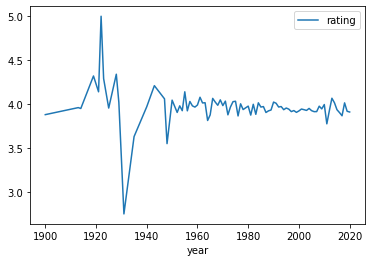

In [26]:
year_wise_rating.plot('year','rating')